<a href="https://colab.research.google.com/github/ricecakeblack/myRepoTest/blob/main/1_2_%E1%84%83%E1%85%A1%E1%84%8B%E1%85%AE%E1%84%8C%E1%85%A9%E1%86%AB%E1%84%89%E1%85%B3%E1%84%8C%E1%85%B5%E1%84%89%E1%85%AE%E1%84%8B%E1%85%AAKOSPI%E1%84%8B%E1%85%B4%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy
!pip install finance-datareader
!pip install yfinance

In [2]:
# y = w1*x1+w2*x2+w3*x3....+b

import FinanceDataReader as fdr
from pandas_datareader import data as pdr
import pandas as pd

import yfinance as yf
yf.pdr_override()

KOSPI_IDX = 'KS11'
DOW_IDX = '^DJI'

sdate='2000-01-04'

kospi = fdr.DataReader(KOSPI_IDX, sdate)
dow = pdr.get_data_yahoo(DOW_IDX, sdate)

[*********************100%%**********************]  1 of 1 completed


In [3]:
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,1028.329956,1066.180054,1016.590027,1059.040039,1059.040039,195900.0
2000-01-05,1006.869995,1026.520020,984.049988,986.309998,986.309998,257700.0
2000-01-06,1013.950012,1014.900024,953.500000,960.789978,960.789978,203500.0
2000-01-07,949.169983,970.159973,930.840027,948.650024,948.650024,215700.0
2000-01-10,979.669983,994.940002,974.820007,987.239990,987.239990,240200.0
...,...,...,...,...,...,...
2023-10-17,2454.139893,2466.870117,2449.419922,2460.169922,2460.169922,508800.0
2023-10-18,2452.050049,2465.330078,2450.780029,2462.600098,2462.600098,911500.0
2023-10-19,2431.919922,2433.449951,2412.550049,2415.800049,2415.800049,756900.0


In [4]:
dow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000
2000-01-10,11532.480469,11638.280273,11532.480469,11572.200195,11572.200195,168180000
...,...,...,...,...,...,...
2023-10-16,33832.421875,34088.980469,33832.421875,33984.539062,33984.539062,270060000
2023-10-17,33869.839844,34147.628906,33854.699219,33997.648438,33997.648438,281010000
2023-10-18,33960.250000,33991.511719,33598.640625,33665.078125,33665.078125,285410000


In [5]:
# 데이터프레임에 kospi와 다우존스지수를 넣어보자
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2023-10-17,33997.648438,2460.169922
2023-10-18,33665.078125,2462.600098
2023-10-19,33414.171875,2415.800049


In [6]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.824256
KOSPI,0.824256,1.000000


In [7]:
# KOSPI와 DOW데이터를 가지고 회귀
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

In [8]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8242558984446746

In [9]:
r_squared = r_value **2
r_squared

0.6793977861208378

In [10]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pyplot as plt

KOSPI_IDX = 'KS11'
DOW_IDX = 'DJI'


sdate = '2000-01-04'

kospi = fdr.DataReader(KOSPI_IDX, sdate)
dow = pdr.get_data_yahoo('^DJI',sdate)

df = pd.DataFrame({'X': dow['Close'], 'Y' : kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

[*********************100%%**********************]  1 of 1 completed


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [12]:
# df.X는 pandas의 series타입 -> numpy array으로 변경
X = df.X.to_numpy()
Y = df.Y.to_numpy()
Y

array([1059.040039,  986.309998,  960.789978, ..., 2415.800049,
       2375.      , 2367.27002 ])

In [13]:
# 5663행
Y.shape

(6182,)

In [14]:
# 1차원 -> 2차원으로 변경
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [15]:
Y.shape

(6182, 1)

In [16]:
# x는 DOW, y는 KOSPI로된 데이터에서 선형회귀를 예측
model.fit(X,Y)

LinearRegression()

In [17]:
# y wx+b coef->w에 해당
model.coef_

array([[0.06784695]])

In [18]:
# intercept는 b에 해당
model.intercept_

array([572.53316728])

In [19]:
model_line = f'Y = {model.coef_[0][0]:.2f} * X + {model.intercept_[0]:.2f}'
print(model_line)

Y = 0.07 * X + 572.53


In [20]:
corr = df['X'].corr(df['Y'])
corr

0.8246971688703786

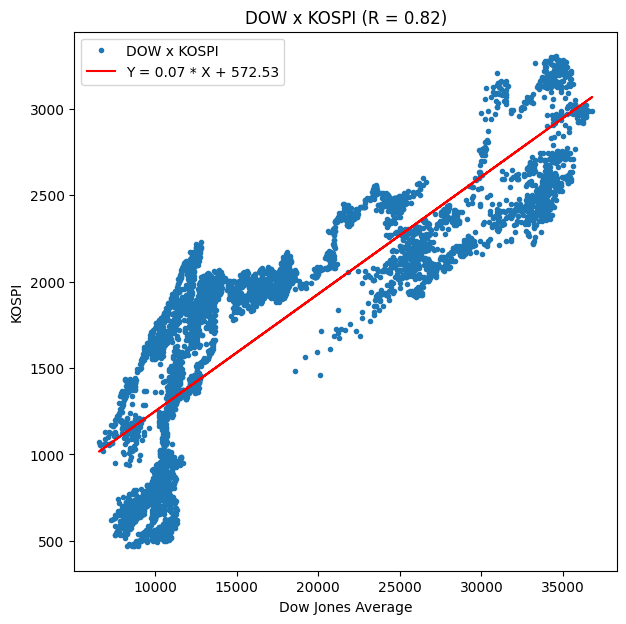

In [21]:
plt.figure(figsize=(7,7))
plt.plot(X, Y,'.')
plt.plot(X, model.coef_*X + model.intercept_, 'r')
plt.legend(['DOW x KOSPI', model_line])
plt.title(f'DOW x KOSPI (R = {corr:.2f})')
plt.xlabel('Dow Jones Average')
plt.ylabel('KOSPI')
plt.show()